# Script for plotting sample locations on the map of Saimaa

## Before you begin

In [ ]:
install.packages("rgdal")
install.packages("sf")
#install.packages("tidyverse")

**Note**: Regarding R packages, you might have to install (sudo apt install) packages unixodbc, unixodbc-dev and libgdal-dev before installing rgdal

## Plotting

Warning message:
“st_crs<- : replacing crs does not reproject data; use st_transform for that”
Saving 6 x 6.67 in image


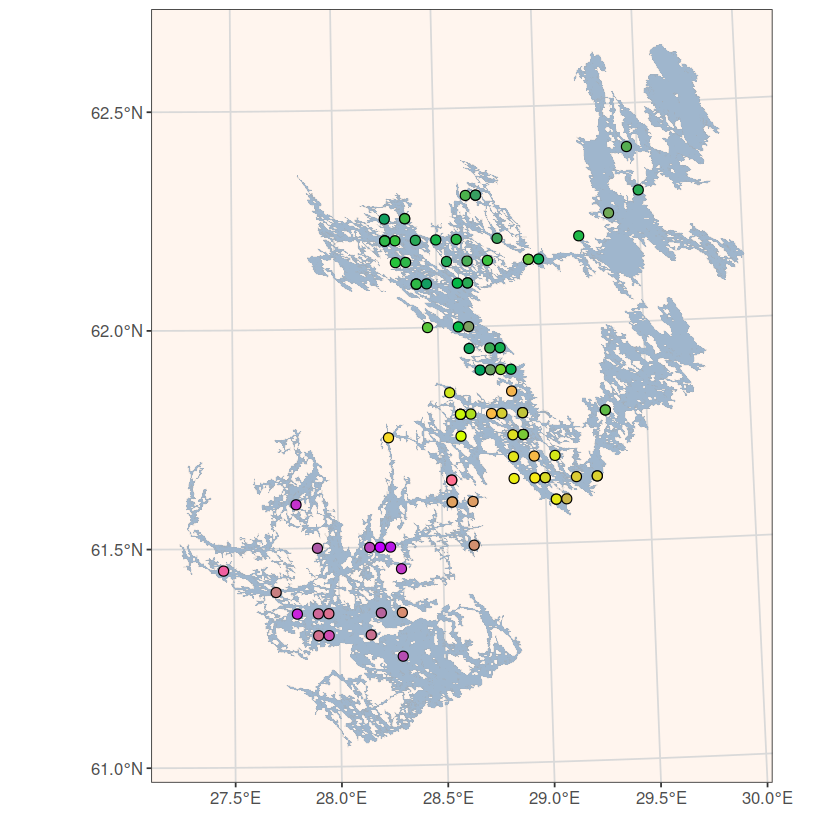

In [11]:
library(rgdal)
library(sf)
library(tidyverse)

setwd("../..")

coords <- read.csv("data/Sample_coordinates_subpop.csv")

pca_cols <- read.table("results/3.smartpca/colors.txt", sep = "\t", header=F)

#In the case that the samples are not in the same order.
k <- match(coords$title,pca_cols$V1)
coords <- coords[k,]

coordinates(coords) <- c("long", "lat")
proj4string(coords) <- CRS("+proj=utm +zone=35 ellps=WGS84")
coords <- coords %>% st_as_sf(coords = c('long','lat')) %>% st_set_crs(4133)

lakes  <- read_sf("data/saimaa_map/jarvi_laatikko.shp")
saimaa <- lakes[grep('Saimaa',lakes$Nimi),]

map <- ggplot()+
  geom_sf(data=saimaa, fill="slategray3",color=gray(0.65),linewidth=0.05)+
  geom_sf(data=coords,fill=pca_cols$V2, shape=21,size=2.5) +
  coord_sf(datum = sf::st_crs(4133)) + theme_bw()+xlab("")+ylab("")+
  theme(
    panel.background = element_rect(fill = 'seashell'),
    panel.grid.minor = element_blank(), 
    panel.grid.major = element_line(color=gray(0.85)),
    axis.text = element_text(size=10)
  ) 

ggsave("results/3.smartpca/saimaa_map.png",map,width=6)

map